In [17]:

import qiskit_mps_initializer
from qiskit import QuantumCircuit

In [18]:
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit.visualization import plot_bloch_vector

DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.


Final statevector:
 Statevector([ 0.5+0.000000e+00j, -0.5+6.123234e-17j,  0.5-6.123234e-17j,
              0.5+0.000000e+00j],
            dims=(2, 2))


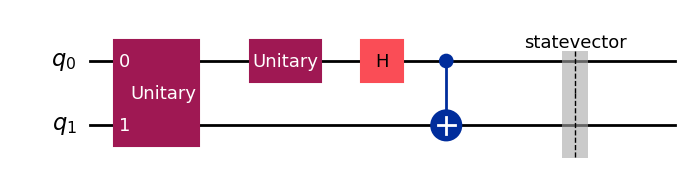

In [19]:
import numpy as np
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit_mps_initializer.datatypes import QuantumState  


psi_bell = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]

# Create QuantumState from Bell vector
state = QuantumState.from_dense_data(psi_bell, normalize=True)

# Generate circuit to initialize Bell state
circuit = state.generate_mps_initializer_circuit(number_of_layers=1)

# Optional: Add more gates after initialization
circuit.h(0)
circuit.cx(0, 1)

# Simulate and print statevector
backend = Aer.get_backend("aer_simulator")
circuit.save_statevector()
compiled = transpile(circuit, backend)
result = backend.run(compiled).result()

final_state = result.get_statevector()
print("Final statevector:\n", final_state)

# Draw circuit

circuit.draw('mpl')


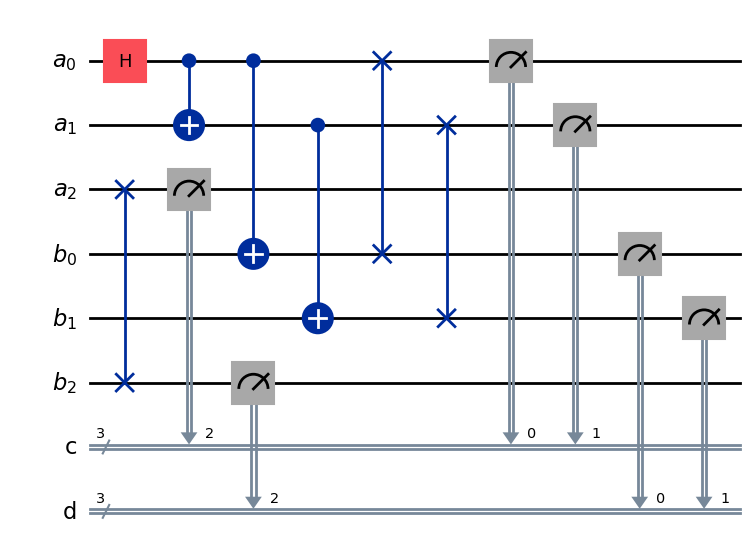

In [20]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
qr1 = QuantumRegister(3, name='a')
qr2 = QuantumRegister(3, name='b')
cr1 = ClassicalRegister(3, name='c')
cr2 = ClassicalRegister(3, name='d')
circuit = QuantumCircuit(qr1, qr2, cr1, cr2)
circuit.h(qr1[0])
circuit.cx(qr1[0], qr1[1])
circuit.cx(qr1[0], qr2[0])
circuit.cx(qr1[1], qr2[1])
circuit.swap(qr2, qr1)
circuit.measure(qr1, cr1,)
circuit.measure(qr2, cr2)
circuit.global_phse = np.pi

circuit.draw('mpl')

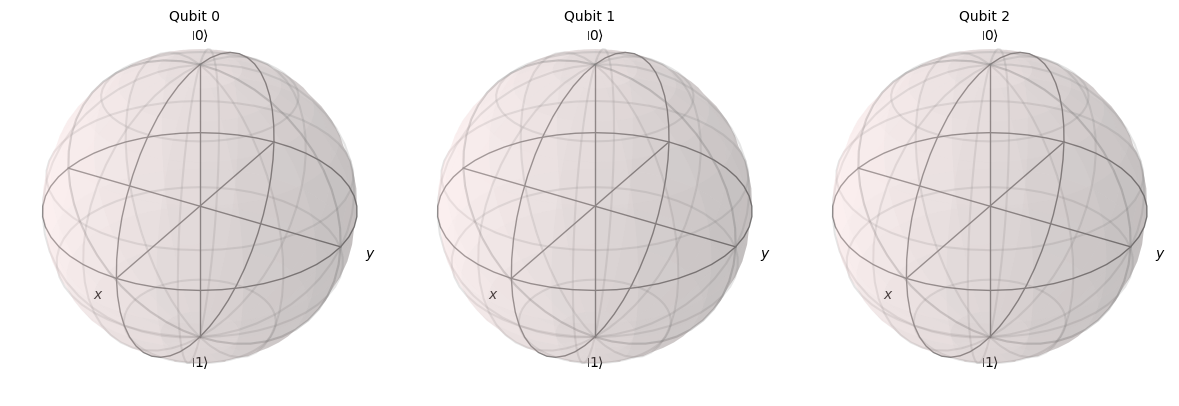

In [21]:
import numpy as np
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix, Pauli
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt

# Define GHZ state: (|000⟩ + |111⟩)/sqrt(2)
psi = (np.kron(np.kron([1,0], [1,0]), [1,0]) + np.kron(np.kron([0,1], [0,1]), [0,1])) / np.sqrt(2)
state = Statevector(psi)
rho = DensityMatrix(state)

# Reduce to 1-qubit subsystems
rho_0 = partial_trace(rho, [1, 2])
rho_1 = partial_trace(rho, [0, 2])
rho_2 = partial_trace(rho, [0, 1])

# Compute Bloch vector manually from Pauli expectation values
def compute_bloch_vector(rho_single):
    paulis = [Pauli('X').to_matrix(), Pauli('Y').to_matrix(), Pauli('Z').to_matrix()]
    bloch = [np.real(np.trace(rho_single.data @ P)) for P in paulis]
    return bloch

# Compute Bloch vectors
bv_0 = compute_bloch_vector(rho_0)
bv_1 = compute_bloch_vector(rho_1)
bv_2 = compute_bloch_vector(rho_2)

# Plotting: Create 3D subplots
fig = plt.figure(figsize=(12, 4))
for i, bloch_vector in enumerate([bv_0, bv_1, bv_2]):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    plot_bloch_vector(bloch_vector, title=f"Qubit {i}", ax=ax)

plt.tight_layout()
plt.show()


/tmp/ipykernel_66463/3893587912.py:9: DeprecationWarning: The class ``qiskit.circuit.library.graph_state.GraphState`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use qiskit.circuit.library.GraphStateGate instead.
  circuit = GraphState(adj)


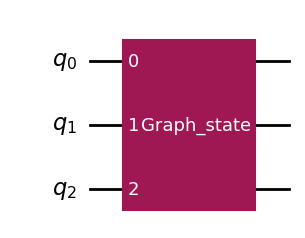

In [22]:
from qiskit.circuit.library import GraphState
import numpy as np

# Triangle graph (3 qubits, all connected)
adj = np.array([[0, 1, 1],
                [1, 0, 1],
                [1, 1, 0]])

circuit = GraphState(adj)
circuit.draw('mpl')


DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.


/tmp/ipykernel_66463/3391695745.py:31: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amp in enumerate(statevector):


|000>: 0j
|001>: 0j
|010>: (-0+0j)
|011>: 0j
|100>: (0.9999999999999999+0j)
|101>: 0j
|110>: (-0+0j)
|111>: (-0+0j)
Counts: {'010': 80, '000': 53, '011': 100, '110': 517, '100': 634, '001': 616}


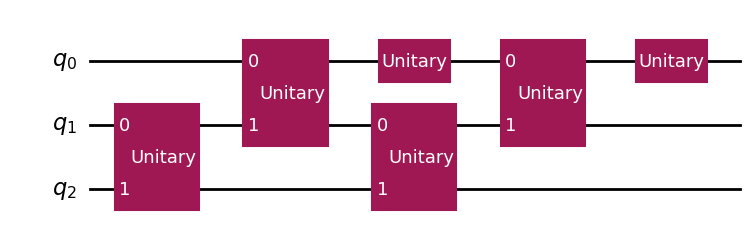

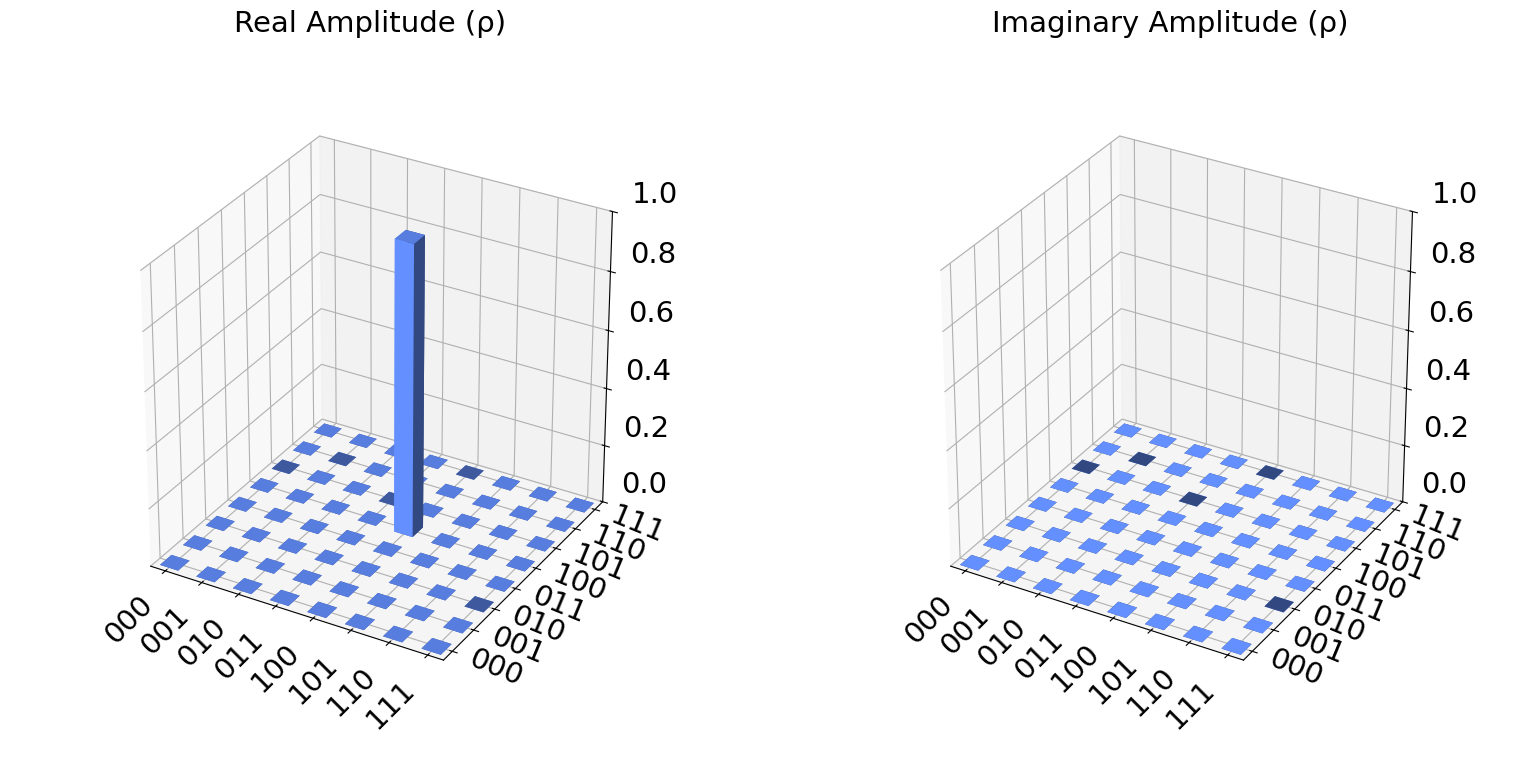

In [30]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit_aer import AerSimulator
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram, plot_state_city
%matplotlib inline

# Step 1: Define a wavefunction
psi = [1, 2, 3, 4, 5, 6, 7, 8]

# Step 2: Normalize and wrap into a QuantumState
qc = QuantumState.from_dense_data(data=psi, normalize=True)

# Step 3: Generate MPS circuit
circuit = qc.generate_mps_initializer_circuit(number_of_layers=2)

circuit.draw('mpl')
circuit.measure_all()
simulator = AerSimulator(method='automatic')

circuit = transpile(circuit, simulator)
circuit.save_statevector()

result = simulator.run(circuit, shots=2000).result()
statevector = result.get_statevector()



counts = result.get_counts()
for i, amp in enumerate(statevector):
    print(f"|{format(i, '03b')}>: {amp}")
print("Counts:", counts)
plot_state_city(statevector)
plt.show()
